In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
from datetime import date, timedelta

%matplotlib inline

List of the country to display and a start date

In [0]:
countryList = ['Germany',
               'France',
               #'Italy',
               'Denmark',
               'United States of America',
               'United Kingdom'
              ]
#countryList = ['China']

startDate = '03/01/2020'

The dataset_file variable must be actualized when a new file is available.

Download the data of today (2020-03-17)...
File for today (2020-03-17) not found. Trying to open the file of yesterday
Download the data of yesterday (2020-03-16)...


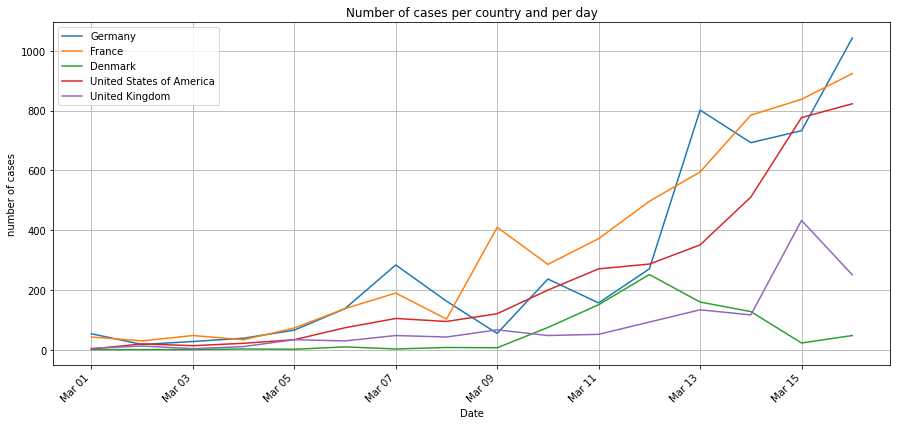

In [19]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/'
dataset_file_root = r'COVID-19-geographic-disbtribution-worldwide-'

today = date.today()
dataset_file = dataset_file_root + today.strftime('%Y-%m-%d') + '.xls'

# Try to find the file for today
try:
  print('Download the data of today ({})...'.format(today.strftime('%Y-%m-%d')))
  df = pd.read_excel(url + dataset_file)
except urllib.error.HTTPError:
  # If exception try the file of yesterday
  print('File for today ({}) not found. Trying to open the file of yesterday'.format(today.strftime('%Y-%m-%d')))
  yesterday = today - timedelta(days=1)
  dataset_file = dataset_file_root + yesterday.strftime('%Y-%m-%d') + '.xls'
  try:
    print('Download the data of yesterday ({})...'.format(yesterday.strftime('%Y-%m-%d')))
    df = pd.read_excel(url + dataset_file)
  except urllib.error.HTTPError:
    print('No File not available for {} and {}...'.format(today.strftime('%Y-%m-%d'), yesterday.strftime('%Y-%m-%d')))
    df = None



if df is not None:
  fig, ax = plt.subplots(figsize=(15,7))

  for c in countryList:
      ax.plot(df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['DateRep']], \
               df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['NewConfCases']])
  ax.set_title('Number of cases per country and per day')
  ax.set_xlabel('Date')
  ax.set_ylabel('number of cases')
  ax.grid(True)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
  ax.legend(countryList)
  fig.autofmt_xdate(rotation=45)
  fig.show()

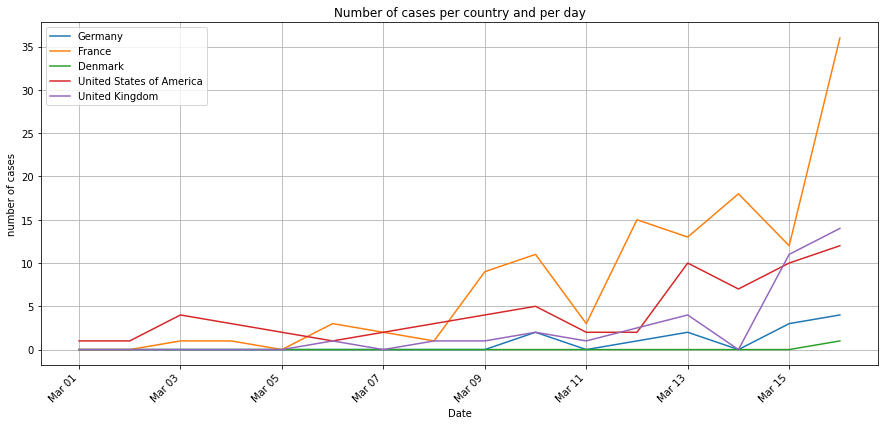

In [10]:
if df is not None:
  fig, ax = plt.subplots(figsize=(15,7))

  for c in countryList:
      ax.plot(df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['DateRep']], \
              df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['NewDeaths']])
  ax.set_title('Number of cases per country and per day')
  ax.set_xlabel('Date')
  ax.set_ylabel('number of cases')
  ax.grid(True)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
  ax.legend(countryList)
  fig.autofmt_xdate(rotation=45)
  fig.show()

In [4]:
df

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-16,Afghanistan,6,0.0,AF,NaN,Non-EU/EEA
1,2020-03-15,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
2,2020-03-11,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
3,2020-03-08,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
4,2020-03-02,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
5245,2020-01-04,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5246,2020-01-03,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5247,2020-01-02,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5248,2020-01-01,Vietnam,0,0.0,VN,NaN,Non-EU/EEA


In [17]:
today = date.today()
print("Today's date:", today)

yesterday = today - timedelta(days=1)
print("Yesterday's date:", yesterday)

Today's date: 2020-03-17
Yesterday's date: 2020-03-16
